In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt  
import glob

In [2]:
!head -10 "Downloads/KCMI_RandomForest/KCMI_hourly.csv"
!head -40 "Downloads/KCMI_RandomForest/KCMI_daily.csv"
hourly =  pd.read_csv("Downloads/KCMI_RandomForest/KCMI_hourly.csv")
daily = pd.read_csv("Downloads/KCMI_RandomForest/KCMI_daily.csv", skiprows=7)
daily = daily.loc[:, ~daily.columns.str.contains('^Unnamed')]
daily

Timestamp,year,month,day,hour,tmpc,dwpc,mslp,wdir,wspd,skct,pr1h,pr6h,doy,woy
2005-12-31 19:00:00,2006,1,1,1,0.6,-1.7,1012.6,220.0,2.1,2.0,0.0,,365,52
2005-12-31 20:00:00,2006,1,1,2,0.0,-1.7,1012.9,160.0,2.1,0.0,0.0,,365,52
2005-12-31 21:00:00,2006,1,1,3,-0.6,-2.2,1013.4,170.0,1.5,0.0,0.0,,365,52
2005-12-31 22:00:00,2006,1,1,4,-1.1,-2.2,1012.9,160.0,3.1,0.0,0.0,,365,52
2005-12-31 23:00:00,2006,1,1,5,-1.1,-2.2,1013.1,160.0,3.1,0.0,0.0,,365,52
2006-01-01 00:00:00,2006,1,1,6,0.0,-2.2,1012.6,150.0,3.6,0.0,0.0,,1,52
2006-01-01 01:00:00,2006,1,1,7,-0.6,-2.2,1012.7,150.0,4.1,0.0,0.0,,1,52
2006-01-01 02:00:00,2006,1,1,8,-0.6,-1.7,1013.2,120.0,3.1,0.0,0.0,,1,52
2006-01-01 03:00:00,2006,1,1,9,-0.6,-1.7,1012.8,110.0,3.6,0.0,0.0,,1,52
 


Daily Averaged Summary
CHAMPAIGN WILLARD AP (IL)
WBAN ID: 94870
Lat/Lon/Elev: 40.0397/-88.2778/754ft.
 
Date,Max Hourly Temp (F),Min Hourly Temp (F),Max Wind Speed (mph),Total Precip (in),
2010-01-01,12,2,15,M,
2010-01-02,6,-5,15,0.00,
2010-01-03,10,-6,11,0.00,
2

,Date,Max Hourly Temp (F),Min Hourly Temp (F),Max Wind Speed (mph),Total Precip (in)
0,2010-01-01,12,2,15,M
1,2010-01-02,6,-5,15,0.00
2,2010-01-03,10,-6,11,0.00
3,2010-01-04,11,-2,20,0.00
4,2010-01-05,10,-1,16,M
5,2010-01-06,18,-3,8,M
6,2010-01-07,22,10,25,M
7,2010-01-08,19,6,20,M
8,2010-01-09,9,-9,16,0.00
9,2010-01-10,19,-12,18,0.00


In [4]:
hourly = hourly.set_index(pd.DatetimeIndex(hourly['Timestamp']))
total_val = hourly.resample('D', how='sum').loc[hourly.index].fillna(method='ffill')
total_val

/Users/arkamitra/anaconda2/envs/vizterra/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  
/Users/arkamitra/anaconda2/envs/vizterra/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


,year,month,day,hour,tmpc,dwpc,mslp,wdir,wspd,skct,pr1h,pr6h,doy,woy
Timestamp,,,,,,,,,,,,,,
2005-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-01 00:00:00,48144.0,24.0,30.0,276.0,110.9,46.1,24211.0,2840.0,131.1,116.0,0.0,0.0,24.0,1248.0
2006-01-01 01:00:00,48144.0,24.0,30.0,276.0,110.9,46.1,24211.0,2840.0,131.1,116.0,0.0,0.0,24.0,1248.0
2006-01-01 02:00:00,48144.0,24.0,30.0,276.0,110.9,46.1,24211.0,2840.0,131.1,116.0,0.0,0.0,24.0,1248.0
2006-01-01 03:00:00,48144.0,24.0,30.0,276.0,110.9,46.1,24211.0,2840.0,131.1,116.0,0.0,0.0,24.0,1248.0


In [5]:
from datetime import timedelta, date

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2010, 1, 1)
end_date = date(2020, 1, 1)
totr = np.zeros((end_date-start_date).days)
doy = np.zeros((end_date-start_date).days)
i = 0
for single_date in daterange(start_date, end_date):
    time = single_date.strftime("%Y-%m-%d 06:00:00")
    date = single_date.strftime("%Y-%m-%d")
    totr[i] = total_val[total_val.index == time]['pr1h'].values[0]
    doy[i] = int(single_date.strftime('%j'))
    print(single_date.strftime("%Y-%m-%d 06:00:00"), totr[i])
    i+=1

2010-01-01 06:00:00 0.0
2010-01-02 06:00:00 0.0
2010-01-03 06:00:00 0.0
2010-01-04 06:00:00 0.0
2010-01-05 06:00:00 -0.1
2010-01-06 06:00:00 1.4
2010-01-07 06:00:00 4.500000000000004
2010-01-08 06:00:00 -1.2
2010-01-09 06:00:00 0.0
2010-01-10 06:00:00 0.0
2010-01-11 06:00:00 -0.4
2010-01-12 06:00:00 -0.7
2010-01-13 06:00:00 0.0
2010-01-14 06:00:00 0.0
2010-01-15 06:00:00 0.0
2010-01-16 06:00:00 0.0
2010-01-17 06:00:00 0.0
2010-01-18 06:00:00 0.0
2010-01-19 06:00:00 0.0
2010-01-20 06:00:00 0.7999999999999999
2010-01-21 06:00:00 6.0
2010-01-22 06:00:00 -0.2
2010-01-23 06:00:00 0.0
2010-01-24 06:00:00 6.4
2010-01-25 06:00:00 -1.7000000000000004
2010-01-26 06:00:00 -1.8000000000000005
2010-01-27 06:00:00 1.2000000000000002
2010-01-28 06:00:00 0.0
2010-01-29 06:00:00 0.0
2010-01-30 06:00:00 0.0
2010-01-31 06:00:00 0.0
2010-02-01 06:00:00 0.0
2010-02-02 06:00:00 0.0
2010-02-03 06:00:00 0.0
2010-02-04 06:00:00 0.0
2010-02-05 06:00:00 4.200000000000002
2010-02-06 06:00:00 -0.8999999999999999
2

2010-11-19 06:00:00 0.0
2010-11-20 06:00:00 -0.1
2010-11-21 06:00:00 0.0
2010-11-22 06:00:00 13.400000000000002
2010-11-23 06:00:00 0.0
2010-11-24 06:00:00 23.6
2010-11-25 06:00:00 11.5
2010-11-26 06:00:00 0.0
2010-11-27 06:00:00 0.0
2010-11-28 06:00:00 0.0
2010-11-29 06:00:00 10.000000000000002
2010-11-30 06:00:00 2.7755575615628914e-17
2010-12-01 06:00:00 -1.2
2010-12-02 06:00:00 -0.2
2010-12-03 06:00:00 4.5
2010-12-04 06:00:00 2.099999999999999
2010-12-05 06:00:00 -0.4
2010-12-06 06:00:00 -0.7999999999999999
2010-12-07 06:00:00 0.0
2010-12-08 06:00:00 0.0
2010-12-09 06:00:00 -0.30000000000000004
2010-12-10 06:00:00 0.0
2010-12-11 06:00:00 20.399999999999995
2010-12-12 06:00:00 0.6
2010-12-13 06:00:00 0.0
2010-12-14 06:00:00 -0.1
2010-12-15 06:00:00 0.19999999999999998
2010-12-16 06:00:00 1.9999999999999991
2010-12-17 06:00:00 -0.30000000000000004
2010-12-18 06:00:00 0.0
2010-12-19 06:00:00 -0.4
2010-12-20 06:00:00 -0.6999999999999998
2010-12-21 06:00:00 0.0
2010-12-22 06:00:00 0.0
2

2011-10-03 06:00:00 0.0
2011-10-04 06:00:00 0.0
2011-10-05 06:00:00 0.0
2011-10-06 06:00:00 0.0
2011-10-07 06:00:00 0.0
2011-10-08 06:00:00 0.0
2011-10-09 06:00:00 0.0
2011-10-10 06:00:00 0.0
2011-10-11 06:00:00 0.0
2011-10-12 06:00:00 1.2000000000000002
2011-10-13 06:00:00 12.200000000000001
2011-10-14 06:00:00 0.3
2011-10-15 06:00:00 0.0
2011-10-16 06:00:00 0.0
2011-10-17 06:00:00 9.1
2011-10-18 06:00:00 0.6000000000000001
2011-10-19 06:00:00 25.700000000000006
2011-10-20 06:00:00 5.8
2011-10-21 06:00:00 0.0
2011-10-22 06:00:00 0.0
2011-10-23 06:00:00 0.0
2011-10-24 06:00:00 -0.2
2011-10-25 06:00:00 -0.1
2011-10-26 06:00:00 0.19999999999999996
2011-10-27 06:00:00 0.39999999999999997
2011-10-28 06:00:00 0.0
2011-10-29 06:00:00 0.0
2011-10-30 06:00:00 1.5
2011-10-31 06:00:00 -0.1
2011-11-01 06:00:00 0.0
2011-11-02 06:00:00 0.0
2011-11-03 06:00:00 31.3
2011-11-04 06:00:00 0.0
2011-11-05 06:00:00 0.0
2011-11-06 06:00:00 0.0
2011-11-07 06:00:00 10.600000000000003
2011-11-08 06:00:00 1.8
2

2012-11-02 06:00:00 0.0
2012-11-03 06:00:00 3.5
2012-11-04 06:00:00 0.0
2012-11-05 06:00:00 0.0
2012-11-06 06:00:00 2.5999999999999996
2012-11-07 06:00:00 0.0
2012-11-08 06:00:00 0.0
2012-11-09 06:00:00 0.0
2012-11-10 06:00:00 0.0
2012-11-11 06:00:00 12.100000000000001
2012-11-12 06:00:00 6.9
2012-11-13 06:00:00 -0.1
2012-11-14 06:00:00 0.0
2012-11-15 06:00:00 -0.1
2012-11-16 06:00:00 0.0
2012-11-17 06:00:00 0.0
2012-11-18 06:00:00 0.0
2012-11-19 06:00:00 -0.1
2012-11-20 06:00:00 0.0
2012-11-21 06:00:00 0.0
2012-11-22 06:00:00 2.1
2012-11-23 06:00:00 0.3
2012-11-24 06:00:00 0.0
2012-11-25 06:00:00 0.0
2012-11-26 06:00:00 -0.4
2012-11-27 06:00:00 0.0
2012-11-28 06:00:00 0.0
2012-11-29 06:00:00 0.0
2012-11-30 06:00:00 0.0
2012-12-01 06:00:00 0.0
2012-12-02 06:00:00 -0.30000000000000004
2012-12-03 06:00:00 0.0
2012-12-04 06:00:00 6.2
2012-12-05 06:00:00 0.0
2012-12-06 06:00:00 0.0
2012-12-07 06:00:00 7.9
2012-12-08 06:00:00 0.09999999999999998
2012-12-09 06:00:00 7.000000000000001
2012-12

2013-11-21 06:00:00 11.700000000000001
2013-11-22 06:00:00 1.3999999999999997
2013-11-23 06:00:00 0.0
2013-11-24 06:00:00 0.0
2013-11-25 06:00:00 -0.30000000000000004
2013-11-26 06:00:00 0.0
2013-11-27 06:00:00 0.0
2013-11-28 06:00:00 0.0
2013-11-29 06:00:00 0.0
2013-11-30 06:00:00 0.0
2013-12-01 06:00:00 0.0
2013-12-02 06:00:00 -0.10000000000000003
2013-12-03 06:00:00 0.0
2013-12-04 06:00:00 0.5
2013-12-05 06:00:00 -0.2
2013-12-06 06:00:00 0.0
2013-12-07 06:00:00 0.0
2013-12-08 06:00:00 -0.6
2013-12-09 06:00:00 -0.2
2013-12-10 06:00:00 0.0
2013-12-11 06:00:00 -0.2
2013-12-12 06:00:00 0.0
2013-12-13 06:00:00 4.6000000000000005
2013-12-14 06:00:00 12.100000000000001
2013-12-15 06:00:00 -0.5
2013-12-16 06:00:00 -0.20000000000000004
2013-12-17 06:00:00 -0.5
2013-12-18 06:00:00 0.0
2013-12-19 06:00:00 0.0
2013-12-20 06:00:00 3.7999999999999994
2013-12-21 06:00:00 20.0
2013-12-22 06:00:00 -0.09999999999999987
2013-12-23 06:00:00 -0.2
2013-12-24 06:00:00 0.0
2013-12-25 06:00:00 -0.2
2013-12-

2014-12-09 06:00:00 0.09999999999999998
2014-12-10 06:00:00 0.0
2014-12-11 06:00:00 0.0
2014-12-12 06:00:00 0.0
2014-12-13 06:00:00 0.0
2014-12-14 06:00:00 0.0
2014-12-15 06:00:00 0.30000000000000004
2014-12-16 06:00:00 -5.551115123125783e-17
2014-12-17 06:00:00 -0.2
2014-12-18 06:00:00 -0.30000000000000004
2014-12-19 06:00:00 0.0
2014-12-20 06:00:00 0.0
2014-12-21 06:00:00 0.0
2014-12-22 06:00:00 10.8
2014-12-23 06:00:00 1.9
2014-12-24 06:00:00 7.4
2014-12-25 06:00:00 -0.1
2014-12-26 06:00:00 0.0
2014-12-27 06:00:00 3.3000000000000003
2014-12-28 06:00:00 0.0
2014-12-29 06:00:00 0.0
2014-12-30 06:00:00 0.0
2014-12-31 06:00:00 0.0
2015-01-01 06:00:00 0.0
2015-01-02 06:00:00 0.3
2015-01-03 06:00:00 12.4
2015-01-04 06:00:00 -1.3
2015-01-05 06:00:00 1.3
2015-01-06 06:00:00 -0.5
2015-01-07 06:00:00 -0.4
2015-01-08 06:00:00 -0.4
2015-01-09 06:00:00 -0.5
2015-01-10 06:00:00 0.0
2015-01-11 06:00:00 3.3
2015-01-12 06:00:00 1.8999999999999995
2015-01-13 06:00:00 0.0
2015-01-14 06:00:00 0.0
2015-

2015-11-05 06:00:00 1.8
2015-11-06 06:00:00 1.1
2015-11-07 06:00:00 0.0
2015-11-08 06:00:00 0.0
2015-11-09 06:00:00 0.0
2015-11-10 06:00:00 0.0
2015-11-11 06:00:00 2.4
2015-11-12 06:00:00 0.0
2015-11-13 06:00:00 0.0
2015-11-14 06:00:00 0.0
2015-11-15 06:00:00 0.0
2015-11-16 06:00:00 3.3999999999999995
2015-11-17 06:00:00 24.599999999999994
2015-11-18 06:00:00 16.4
2015-11-19 06:00:00 0.0
2015-11-20 06:00:00 0.0
2015-11-21 06:00:00 12.700000000000003
2015-11-22 06:00:00 0.0
2015-11-23 06:00:00 0.0
2015-11-24 06:00:00 0.0
2015-11-25 06:00:00 0.6
2015-11-26 06:00:00 0.4
2015-11-27 06:00:00 27.9
2015-11-28 06:00:00 1.6999999999999997
2015-11-29 06:00:00 0.0
2015-11-30 06:00:00 3.0999999999999996
2015-12-01 06:00:00 1.2
2015-12-02 06:00:00 -5.551115123125783e-17
2015-12-03 06:00:00 0.0
2015-12-04 06:00:00 0.0
2015-12-05 06:00:00 0.0
2015-12-06 06:00:00 1.3
2015-12-07 06:00:00 0.0
2015-12-08 06:00:00 0.0
2015-12-09 06:00:00 0.0
2015-12-10 06:00:00 0.0
2015-12-11 06:00:00 -0.2
2015-12-12 06:0

2016-10-07 06:00:00 0.0
2016-10-08 06:00:00 0.0
2016-10-09 06:00:00 0.0
2016-10-10 06:00:00 0.0
2016-10-11 06:00:00 0.5
2016-10-12 06:00:00 5.699999999999999
2016-10-13 06:00:00 -0.2
2016-10-14 06:00:00 0.0
2016-10-15 06:00:00 0.0
2016-10-16 06:00:00 7.8
2016-10-17 06:00:00 0.0
2016-10-18 06:00:00 0.0
2016-10-19 06:00:00 4.9
2016-10-20 06:00:00 19.3
2016-10-21 06:00:00 0.0
2016-10-22 06:00:00 0.0
2016-10-23 06:00:00 0.0
2016-10-24 06:00:00 0.0
2016-10-25 06:00:00 1.2
2016-10-26 06:00:00 8.400000000000002
2016-10-27 06:00:00 0.0
2016-10-28 06:00:00 0.0
2016-10-29 06:00:00 0.0
2016-10-30 06:00:00 0.0
2016-10-31 06:00:00 0.0
2016-11-01 06:00:00 0.0
2016-11-02 06:00:00 7.7
2016-11-03 06:00:00 -0.1
2016-11-04 06:00:00 0.0
2016-11-05 06:00:00 0.0
2016-11-06 06:00:00 0.0
2016-11-07 06:00:00 0.0
2016-11-08 06:00:00 8.700000000000001
2016-11-09 06:00:00 0.0
2016-11-10 06:00:00 0.0
2016-11-11 06:00:00 -0.1
2016-11-12 06:00:00 0.0
2016-11-13 06:00:00 0.0
2016-11-14 06:00:00 0.0
2016-11-15 06:00:0

2017-08-30 06:00:00 0.0
2017-08-31 06:00:00 0.0
2017-09-01 06:00:00 0.0
2017-09-02 06:00:00 0.0
2017-09-03 06:00:00 0.0
2017-09-04 06:00:00 2.1
2017-09-05 06:00:00 0.0
2017-09-06 06:00:00 0.0
2017-09-07 06:00:00 0.0
2017-09-08 06:00:00 0.0
2017-09-09 06:00:00 0.0
2017-09-10 06:00:00 0.0
2017-09-11 06:00:00 0.0
2017-09-12 06:00:00 -0.2
2017-09-13 06:00:00 0.8000000000000002
2017-09-14 06:00:00 0.0
2017-09-15 06:00:00 0.0
2017-09-16 06:00:00 0.0
2017-09-17 06:00:00 -0.30000000000000004
2017-09-18 06:00:00 11.399999999999999
2017-09-19 06:00:00 2.4999999999999996
2017-09-20 06:00:00 0.0
2017-09-21 06:00:00 0.0
2017-09-22 06:00:00 -0.2
2017-09-23 06:00:00 0.0
2017-09-24 06:00:00 0.0
2017-09-25 06:00:00 0.0
2017-09-26 06:00:00 0.0
2017-09-27 06:00:00 0.0
2017-09-28 06:00:00 0.0
2017-09-29 06:00:00 0.0
2017-09-30 06:00:00 0.0
2017-10-01 06:00:00 0.0
2017-10-02 06:00:00 0.0
2017-10-03 06:00:00 0.7999999999999999
2017-10-04 06:00:00 1.0
2017-10-05 06:00:00 25.2
2017-10-06 06:00:00 23.199999999

2018-06-30 06:00:00 0.0
2018-07-01 06:00:00 18.599999999999998
2018-07-02 06:00:00 0.0
2018-07-03 06:00:00 0.0
2018-07-04 06:00:00 0.0
2018-07-05 06:00:00 31.0
2018-07-06 06:00:00 0.0
2018-07-07 06:00:00 0.0
2018-07-08 06:00:00 0.0
2018-07-09 06:00:00 0.0
2018-07-10 06:00:00 4.8
2018-07-11 06:00:00 0.0
2018-07-12 06:00:00 0.0
2018-07-13 06:00:00 0.0
2018-07-14 06:00:00 25.099999999999994
2018-07-15 06:00:00 22.3
2018-07-16 06:00:00 0.0
2018-07-17 06:00:00 0.0
2018-07-18 06:00:00 0.0
2018-07-19 06:00:00 0.0
2018-07-20 06:00:00 -0.2
2018-07-21 06:00:00 2.7999999999999994
2018-07-22 06:00:00 15.5
2018-07-23 06:00:00 0.0
2018-07-24 06:00:00 0.0
2018-07-25 06:00:00 0.0
2018-07-26 06:00:00 0.0
2018-07-27 06:00:00 0.0
2018-07-28 06:00:00 0.0
2018-07-29 06:00:00 7.9
2018-07-30 06:00:00 9.000000000000002
2018-07-31 06:00:00 -2.7755575615628914e-17
2018-08-01 06:00:00 0.0
2018-08-02 06:00:00 0.0
2018-08-03 06:00:00 0.3
2018-08-04 06:00:00 0.0
2018-08-05 06:00:00 0.0
2018-08-06 06:00:00 0.0
2018-

2019-05-05 06:00:00 0.0
2019-05-06 06:00:00 0.0
2019-05-07 06:00:00 -0.2
2019-05-08 06:00:00 0.6000000000000001
2019-05-09 06:00:00 35.79999999999999
2019-05-10 06:00:00 0.0
2019-05-11 06:00:00 5.6000000000000005
2019-05-12 06:00:00 1.0
2019-05-13 06:00:00 0.0
2019-05-14 06:00:00 -0.2
2019-05-15 06:00:00 0.19999999999999996
2019-05-16 06:00:00 0.0
2019-05-17 06:00:00 0.0
2019-05-18 06:00:00 0.0
2019-05-19 06:00:00 8.8
2019-05-20 06:00:00 0.0
2019-05-21 06:00:00 12.899999999999999
2019-05-22 06:00:00 11.500000000000002
2019-05-23 06:00:00 2.6999999999999997
2019-05-24 06:00:00 0.0
2019-05-25 06:00:00 0.0
2019-05-26 06:00:00 18.999999999999996
2019-05-27 06:00:00 0.0
2019-05-28 06:00:00 0.8
2019-05-29 06:00:00 5.700000000000002
2019-05-30 06:00:00 0.7999999999999999
2019-05-31 06:00:00 0.0
2019-06-01 06:00:00 0.0
2019-06-02 06:00:00 0.0
2019-06-03 06:00:00 0.0
2019-06-04 06:00:00 0.0
2019-06-05 06:00:00 0.0
2019-06-06 06:00:00 0.0
2019-06-07 06:00:00 0.0
2019-06-08 06:00:00 0.8
2019-06-0

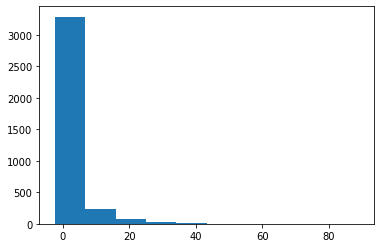

            Date Max Hourly Temp (F) Min Hourly Temp (F) Max Wind Speed (mph)  \
0     2010-01-01                  12                   2                   15   
1     2010-01-02                   6                  -5                   15   
2     2010-01-03                  10                  -6                   11   
3     2010-01-04                  11                  -2                   20   
4     2010-01-05                  10                  -1                   16   
5     2010-01-06                  18                  -3                    8   
6     2010-01-07                  22                  10                   25   
7     2010-01-08                  19                   6                   20   
8     2010-01-09                   9                  -9                   16   
9     2010-01-10                  19                 -12                   18   
10    2010-01-11                  23                  16                   16   
11    2010-01-12            

In [9]:
totr; plt.hist(totr); plt.show()
daily['Total Precip (in)']=totr
daily['Day of Year']=doy.astype('int')
print(daily)
daily.to_csv("Downloads/KCMI_RandomForest/KCMI_daily_updated.csv", encoding='utf-8')